**Assignment 2: Regression and classification**

***1. The dataset associated to this assignment was downloaded from www.hemnet.se on 2020-10-18. 
The data contains information about selling prices of villas in Landvetter that were sold in the past 12 months.***


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D 
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model
#from scipy import 
from sklearn.model_selection import train_test_split
import seaborn as sns

df = pd.read_csv("data_assignment2.csv")
df

,ID,Living_area,Rooms,Land_size,Biarea,Age,Selling_price
0,1,104,5.0,271.0,25.0,33,4600000
1,2,99,5.0,1506.0,6.0,88,4450000
2,3,133,6.0,486.0,NaN,44,4900000
3,4,175,7.0,728.0,NaN,14,6625000
4,5,118,6.0,1506.0,NaN,29,4600000
5,6,133,6.0,823.0,NaN,12,6650000
6,7,70,4.0,1685.0,70.0,53,2800000
7,8,134,6.0,1593.0,49.0,57,6100000
8,9,70,5.0,1120.0,102.0,81,3000000
9,10,133,6.0,1503.0,NaN,51,3000000


***a. Find a linear regression model that relates the living area to the selling price. If you did any data cleaning step(s), describe and explain why you did that.***


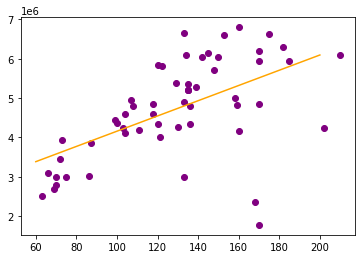

In [ ]:
# get as an array([]) and an array()
X0 = df.loc[:, ['Living_area']].values
y0 = df['Selling_price']

#Generating a linear regression model, which is a line in this case
model0 = LinearRegression().fit(X0, y0)

#Plotting the regresion line
xfit0 = np.linspace(60, 200, 1000) #1000 evenly spaced points in [0, 55].
yfit0 = model0.predict(xfit0[:, np.newaxis])

plt.scatter(X0,y0, color='purple')
plt.plot(xfit0, yfit0, color='orange')
plt.show()


We plotted our data and saw some outlier values; values that was very far from the other values.

The biggest question we faced were "how many datapoints should we delete to get at more useful linear regression?"
One chould always be very careful cleaning out outliers. We decide to choose some outliers, but we want to still plot them to show the whole truth.

We chose our outliners from the measurment of the mean and standsard deviation, 
and basically just accepted twice our standard deviation because that gave us a few outliers but not to many.

Then we calculated the linear regression and plotted everything to verify our result.

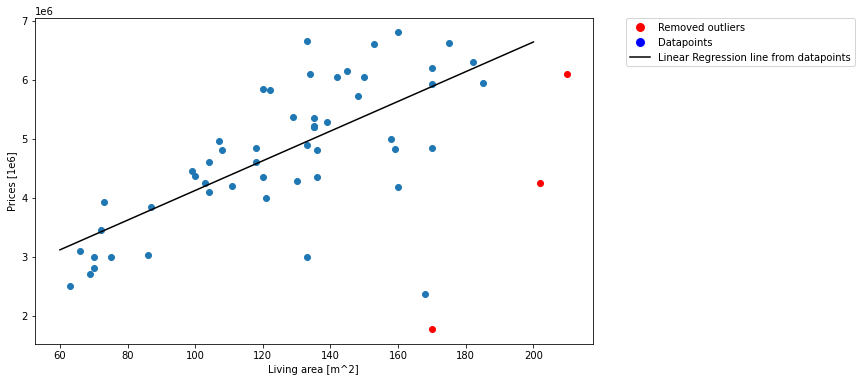

In [ ]:
# get as an 2D array and an 1D array
area = df.loc[:, ['Living_area']].values
price = df['Selling_price']

# we determin outliners based on mean+2*standard deviation
lower_x = area.mean() - 2*area.std()
upper_x = area.mean() + 2*area.std()
lower_y = price.mean() - 2*price.std()
upper_y = price.mean() + 2*price.std()
areal = df['Living_area']

# find outliers
outliers_df = df[( (areal  > upper_x) | (areal  < lower_x) | (price > upper_y) | (price < lower_y) )]
x_outliers = outliers_df.loc[:, ['Living_area']]
y_outliers = outliers_df['Selling_price']

#remove outliers
filtered_df = df[( (areal   < upper_x) & (areal > lower_x) & (price < upper_y) & (price > lower_y))]
X = filtered_df.loc[:, ['Living_area']].values
y = filtered_df['Selling_price']

#Generating a linear regression model, which is a line in this case
model = LinearRegression().fit(X, y)
xfit = np.linspace(60, 200, 1000) #1000 evenly spaced points in [0, 55].
yfit = model.predict(xfit[:, np.newaxis])

# Create figure and axis objects with subplots('Horizontally stacked subplots' )
fig, ax1 = plt.subplots(figsize=(10,6))

ax1.scatter(X,y)
ax1.scatter(x_outliers,y_outliers,color='red')
ax1.plot(xfit, yfit, color='black')
ax1.set_xlabel("Living area [m^2]")
ax1.set_ylabel("Prices [1e6]")
plt.title('')

#legend
l1 = Line2D([0],[0], marker='o', color='w', label='Removed outliers', markerfacecolor='red', markersize=10)
l2 = Line2D([0],[0], marker='o', color='w', label='Datapoints', markerfacecolor='blue', markersize=10)
l3 = Line2D([0],[0],  color='black', label='Linear Regression line from datapoints')

fig.legend(handles=[l1,l2,l3],bbox_to_anchor=(0.94,0.89), loc='upper left')
plt.show()

***b. What are the values of the slope and intercept of the regression line?***


In [ ]:
# Slope of the regression is the coeffictient of the model
print('Slope:', model.coef_[0])

# Intercept of the model by calling intercept_
print('Intercept:', model.intercept_ )

Slope: 25160.26380939493
Intercept: 1606573.8212559996


***c. Use this model to predict the selling prices of houses which have living area
100m^2 ,150m^" and 200m^2 .***

In [ ]:
# The areas that we want to predict as a 2D array
area_array = [[100], [150], [200]]

# Prediction for the areas using the linear regression model
pred = model.predict(area_array)

print('Prediction of prices:')
print('100m2: %d' % pred[0], 'SEK')
print('150m2: %d' % pred[1], 'SEK')
print('200m2: %d' % pred[2], 'SEK')

Prediction of prices:
100m2: 4122600 SEK
150m2: 5380613 SEK
200m2: 6638626 SEK


***d. Draw a residual plot.***


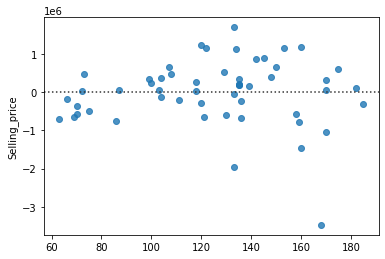

In [ ]:
""" 
Use seaborn's residual plot instead of re-inventing the wheel
While we could spend time on creating our own the same way
as we have done before with scatter and line plots, we felt
better to spend time on other parts. Needs to specify x and
y in order not to generate future warnings.
"""
sns.residplot(x=X, y=y)
plt.show()

***e. Discuss the results, and how the model could be improved.***

First question we are asking us, did the data cleaning do anything?

Let's examine if there were any difference, we'll both calculate the values and display them in a plot as
can bee seen below.

Slope unfiltered: 19370
Slope filtered: 25160
Difference in slope: -5790
Difference in intercept: 614029 


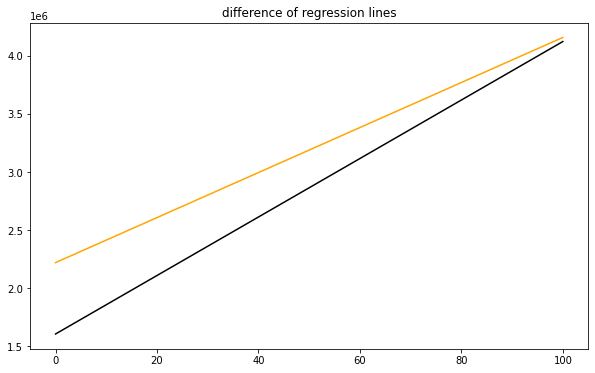

In [ ]:
# Slope of the regression is the coeffictient of the model
print('Slope unfiltered: %d' % model0.coef_[0])
print('Slope filtered: %d' % model.coef_[0])
print('Difference in slope: %d'  % (model0.coef_[0] - model.coef_[0]))
print('Difference in intercept: %d ' % (model0.intercept_ - model.intercept_) )


xfit00 = np.linspace(0, 100, 100) 
yfit00 = model0.predict(xfit00[:, np.newaxis])

xfit11 = np.linspace(0, 100, 100) 
yfit11 = model.predict(xfit11[:, np.newaxis])

fig, ax1 = plt.subplots(figsize=(10,6))
ax1.plot(xfit00, yfit00, color='orange')
ax1.plot(xfit11, yfit11, color='black')
plt.title('difference of regression lines')
plt.show()

We can see that the removal of the three outliers creates a different regression line, with a difference
in the interception of ~614000 SEK. It also meant that the outliers also changes the slope of
the regression with ~5790 SEK/m^2. This results in that for smaller m^2 values, the difference in
prices is very large, while for larger living areas it has similiar prices.


We conclude that our data cleaning made a difference, 
and maybe we could have cleaned some more to get it even better by 
using 2.5*mean+std_deviation instead of 2.
Or we could use a completely different way of picking out or outliners.
The model could been "improved" of we used a higher value for the standard
deviation from mean, for instance 3 or more. This would result that the
predictions would be closer to the actual values, but at the same time
the data being used to train the model doesn't represent the true data. 
This "improved" model would have an regression line that's closer to the 
actual values, but might not be better to predict a value that was prevously 
filtered away.

A different thought is that we maybe we should not get rid of outliers but manipulate their data to close the gap between them and the rest of the data. 
But this may lead to a much to sketchy approach.


**residual plot**

If we look at our residual plot we got a mix belween a balanced residual and a high variance residual. 

Is our model too underfitted? If we were to adress all datapoints, the model could get too overfitted. 
But we could use a little more complex arbitrary base function, but that is something build in in the linear reagression method.

A balanced residual is proof that this method is perfect for this data, 
but since ours wasn't perfect balanced this could indicate that there would be a better method.

Maybe there is a hint of an unbalanced but not strong enought to give a strong indicator for using a different method. 
This could be something that would get better with more datacleaning.

In summary nothing strongly indicates that this i a bad method.


**prediction** 

In task c we wanted to predict prices. 
The regression model could be more correctly made if it was done with splitting the dataset into 
a training part and a testing part. 
What we have now is just learning from 100% of our data and then predictiong 
totaly unknown data. We can never check how correct or wrong our guess was is so we can't know how good our prediciton is.
In task c we want to predict data that we already know and have used to build our model,
this is a bit ridiculous.


In order to have an accurate regression model, the prediction should be used on unkown sets.
In order to tell how good our model is we split our data. Then we can train our data and test it 
on new data, which we then can confirm our accuracy from the true results saved in our splitted test data.

Below is an example of how that would've been done, with the same model as previously demonstrated but tested on its
own values. 

In the example below it can be tested to see how good the predictions are for the regression model, which cannot be
done in the calculations for the previous questions since 


Mean squared error: 1940.164174960905


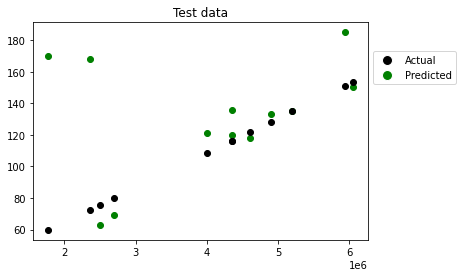

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# get as an array([])
X = df.loc[:, ['Selling_price']].values
y = df['Living_area']

#80 precent will be training values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#Generating a linear regression model from the train data, which is a line in this case
model = LinearRegression().fit(X_train, y_train)

#Plotting the regresion line
xfit = np.linspace(0, 7000000, 1000) #1000 evenly spaced points in [0, 55].
yfit = model.predict(xfit[:, np.newaxis])

# testing data
# testing how good our linear regression line is by predicting our test values 
y_pred = model.predict(X_test)

print('Mean squared error:', mean_squared_error(y_test, y_pred))

plt.scatter(X_test, y_test, color='green')
plt.scatter(X_test, y_pred, color='black')

#legend
l1 = Line2D([0],[0], marker='o', color='w', label='Actual', markerfacecolor='black', markersize=10)
l2 = Line2D([0],[0], marker='o', color='w', label='Predicted', markerfacecolor='green', markersize=10)
plt.legend(handles=[l1,l2],bbox_to_anchor=(1,0.89), loc='upper left')
plt.title('Test data')
plt.show()

To improve this even more we could split our data in different ways and maybe use a 10-fold cross-validation instead.

Another thought is to try a completely diffent method than linear regression and then compare the methods.


***2.In this question, you will use the Iris data set (“from sklearn.datasets import load_iris”). ***


In [ ]:
from sklearn.datasets import load_iris
from sklearn import metrics, neighbors
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

iris = load_iris()

***a. Use a confusion matrix to evaluate the use of logistic regression to classify the iris data set.***

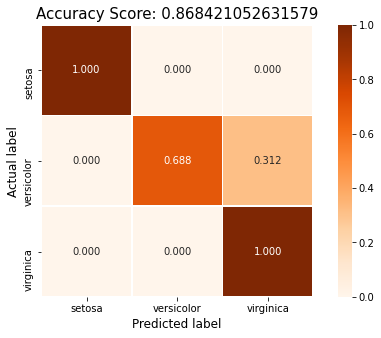

In [ ]:
#LOGISTIC REGRESSION

# Divide the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.25, random_state=0)
class_names = iris.target_names

# create and train our model
logistic_reg = LogisticRegression(multi_class='ovr', solver='liblinear')
logistic_reg.fit(x_train, y_train)

# From new data it will predict the label/name 
logistic_reg.predict(x_test[0].reshape(1,-1))

# Predict for Multiple Observations at once / on all test data (array x_test) 
predictions = logistic_reg.predict(x_test)
#print(x_test)

# Use the score method to get the accuracy of model
score = logistic_reg.score(x_test, y_test)
#print(score)


#NORMALIZED CONFUSION MATRIX

#plotting a confusion matrix, a table that describes the performance of a classifier on a set of test data for which the true values are known.
confmatr = metrics.confusion_matrix(y_test, predictions, normalize='true')


fig, ax1 = plt.subplots(figsize=(9,5))
sns.heatmap(confmatr, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Oranges')
ax1.set_xticklabels(class_names)
ax1.set_yticklabels(class_names)
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15)
plt.ylabel('Actual label',size=12)
plt.xlabel('Predicted label',size=12)
#plt.savefig('toy_Digits_ConfusionSeabornCodementor.png')
plt.show(); 

We can see that some tests intendend to be Versicolor but were misclassified as Virginica (seen as middle right square 0.312).


***b. Use k-nearest neighbours to classify the iris data set with some different values for k, and with uniform and distance-based weights. What will happen when k grows larger for the different cases? Why?***

We want to test the accuracy for different values of k so we make a loop. 

We also want to do this for both uniform wights (all neighborhood points have an equall weight)
and distance-based weight (neighborhood have different weight values, closer neighbors of a query point will have a greater influence than neighbors which are further away).



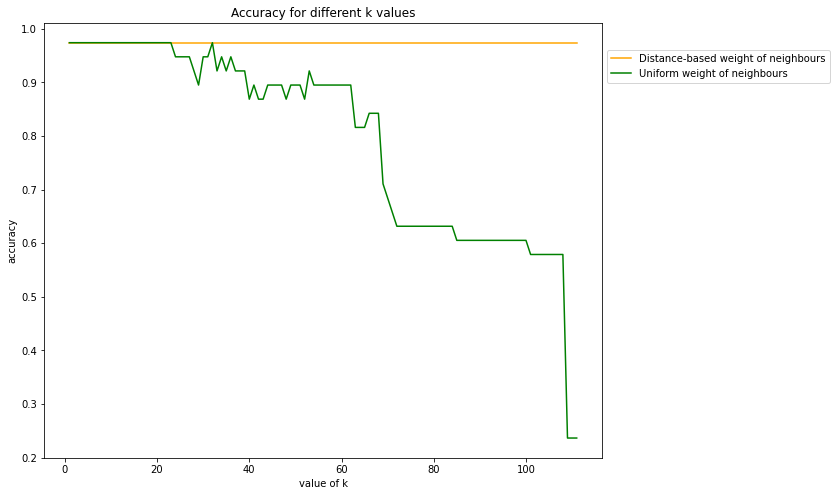

In [ ]:
plt.figure(figsize=(10,8))

for weight in ['distance','uniform']:
    k = list(range(1, 112))
    accuracy = []
    for i in k:
        #Create KNN Classifier
        knn = KNeighborsClassifier(n_neighbors=i,weights=weight) 
        #Train the model using the training sets
        knn.fit(x_train, y_train)

        #Predict the response for test dataset
        y_pred = knn.predict(x_test)

        # Model Accuracy, how often is the classifier correct?
        accuracy.append(metrics.accuracy_score(y_test, y_pred))
        
    # adding labels depending type of weight
    if weight == 'distance':
        l1, = plt.plot(k,accuracy, label='Distance-based weight of neighbours',color='orange')
    else:
        l2, = plt.plot(k,accuracy, label='Uniform weight of neighbours', color='green')
    plt.xlabel('value of k')
    plt.ylabel('accuracy')
    plt.title('Accuracy for different k values')

plt.legend(handles=[l1,l2],bbox_to_anchor=(1,0.95), loc='upper left')
plt.show()


For a distance-based weight of neighbours the accuracy stay the same.
Even though the number of neighbours increase the classification will be influenced less by them 
when they are at a greater distance.

When k increases for uniform weighted neighbours we see a decrease of accuracy.
The accuracy is pretty good up until considering half of the neighbours but make a large drop after this. 
This is very logical since it takes a k number of neighbours into consideration and 
predict the value on what the majority of the neighbours are.


The optimal choice of the value k is dependent on what data we want to examine,
where noise in the data has less effect if the value of k is larger, but the 
boundaries of the classification becomes less distinct.

***c. Compare the classification models for the iris data set that are generated by k-nearest neighbours (for the different settings from question 3) and by logistic regression. Calculate confusion matrices for these models and discuss the performance of the various models.***


We will create a confusion matrix for the data we provided ni task b.

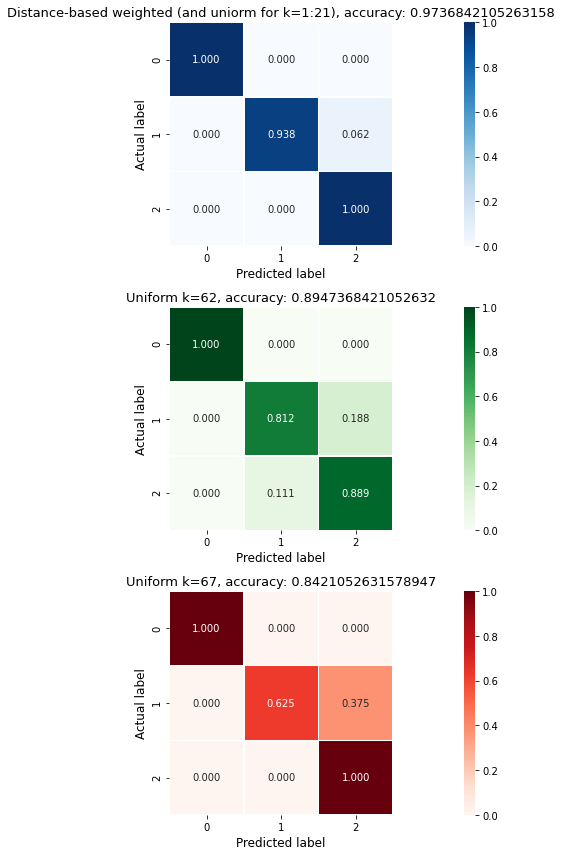

In [ ]:
# create neighbors to test with below
neighbors = 62
neighbors2 = 67

# create three different classifiers, with different weights and different no of neighbors
knn_distance = KNeighborsClassifier(n_neighbors=neighbors, weights='distance') 
knn_uniform = KNeighborsClassifier(n_neighbors=neighbors) 
knn_uniform2 = KNeighborsClassifier(n_neighbors=neighbors2) 

#Train the models using the training sets
knn_distance.fit(x_train, y_train)
knn_uniform.fit(x_train, y_train)
knn_uniform2.fit(x_train, y_train)

#Predict the response for test dataset
y_pred_distance = knn_distance.predict(x_test)
y_pred_uniform = knn_uniform.predict(x_test)
y_pred_uniform2 = knn_uniform2.predict(x_test)

#create a nomarized confusion matrix
cm_knn_distance = metrics.confusion_matrix(y_test, y_pred_distance, normalize='true')
cm_knn_uniform = metrics.confusion_matrix(y_test, y_pred_uniform,  normalize='true')
cm_knn_uniform2 = metrics.confusion_matrix(y_test, y_pred_uniform2,  normalize='true')

# Use the score method to get the accuracy of model
score_distance = knn_distance.score(x_test, y_test)
score_uniform = knn_uniform.score(x_test, y_test)
score_uniform2 = knn_uniform2.score(x_test, y_test)

# plot matrices in three rows
fig, axs = plt.subplots(figsize=(20,12), nrows=3)

# create confusion matrices with seaborn's heatmap
sns.heatmap(cm_knn_distance, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues', ax=axs[0])
sns.heatmap(cm_knn_uniform, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Greens', ax=axs[1])
sns.heatmap(cm_knn_uniform2, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Reds', ax=axs[2] )

# visual setup of plots
axs[0].set_title('Distance-based weighted (and uniorm for k=1:21), accuracy: {0}'.format(score_distance), size=13)
axs[0].set_ylabel('Actual label',size=12)
axs[0].set_xlabel('Predicted label',size=12)
axs[1].set_title('Uniform k=62, accuracy: {0}'.format(score_uniform), size=13)
axs[1].set_ylabel('Actual label',size=12)
axs[1].set_xlabel('Predicted label',size=12)
axs[2].set_title('Uniform k=67, accuracy: {0}'.format(score_uniform2), size=13)
axs[2].set_ylabel('Actual label',size=12)
axs[2].set_xlabel('Predicted label',size=12)
plt.tight_layout()
plt.show(); 

Here we have three cofusion matrixes for k nearest neighbour.

The first blue one is when applying distance-based accuracy for all k,
and it also represents a uniform weight of neihgbours when choosing k as a value between 0-21, as we see in our plot in task b.
The blue matrix has the best accuracy of 97 percent.

The second and third, green and red matrix, displays a KNeighborsClassifier that uses uniform weight for all neighbours.
The second matrix with k=62 has an accuracy of almost 90% whilst the third confusion matrix using k=67 only has an accurucy of 84%. 
This drop is also well displayed in our plot in task b. 

We compare these three confusion matrixes (blue, green and red) to the orange confusion matrix in task a.

The method logistic regression got an accuracy of ~87%. 
An immediate comparison we can say that in our case the logistic regression 
therefor represents the knn method using a value of k between 62 and 67.

We conclude that the k nearest neighbour is a more accurate way to predict the correct answer 
(we think it is self-evident that k should be less than half of the data (112/2)).
And adding that this conclusion is for this exact data. 
For other data this can may not be true and therefor this type of comparison should always be done. 


**3. Explain why it is important to use a seperate test (and sometimes validation) set.**

It is important to divide the dataset into different set, a training set and a testing set, in order for the 
models to train on data that is previously not known. The testing set it indepdendent from the training set, but
are of the same type of datapoints but with different values for them. When the model then is used with the test set, it gets an unbiased mesure of performance. The validation set is similar to the test sets, but where
you use it to go back and forth to tweek the algorithms. So if a test set is used multiple times after tweaking,
it just in a sense becomes a validation test; the test set should not affect the model. So in order for our
model to correctly predict unkown results, the training data is used to fit the model. If you would not divide
the sets, then when checking the accuracy and precision of the model would not yield beneficial results. Yes, the
accuracy would become great if test data is used both in training and in testing, but when prompted with new unkown
test data it might not be accurate at all since it was tweaked using false promises.
